In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('googl.txt')
df=df.dropna()
dataset_train=df[0:1200]
dataset_test =df[1201:1257]
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
dataset_train.isna().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2004-08-19,50.000,52.03,47.980,50.170,44703800,0
1,2004-08-20,50.505,54.54,50.250,54.155,22857200,0
2,2004-08-23,55.375,56.74,54.525,54.700,18274400,0
3,2004-08-24,55.620,55.80,51.785,52.435,15262600,0
4,2004-08-25,52.480,54.00,51.940,53.000,9197800,0


In [5]:
training_set

array([[ 50.   ],
       [ 50.505],
       [ 55.375],
       ...,
       [198.15 ],
       [198.33 ],
       [195.98 ]])

In [6]:
dataset_train.tail()

,Date,Open,High,Low,Close,Volume,OpenInt
1195,2009-05-19,198.05,200.82,196.50,199.44,5675000,0
1196,2009-05-20,201.04,202.84,197.50,198.59,4568000,0
1197,2009-05-21,198.15,201.42,196.92,198.25,5439600,0
1198,2009-05-22,198.33,199.32,196.00,196.75,3437200,0
1199,2009-05-26,195.98,202.50,195.00,202.18,6209000,0


In [7]:
training_set

array([[ 50.   ],
       [ 50.505],
       [ 55.375],
       ...,
       [198.15 ],
       [198.33 ],
       [195.98 ]])

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [9]:
X_train = []
y_train = []
for i in range(60, 1200):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [10]:
X_train.shape

(1140, 60, 1)

In [11]:

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.
C:\Users\ayush\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ayush\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ayush\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users

In [13]:
regressor = Sequential()

regressor.add(LSTM(units = 25, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 25, return_sequences = True))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 25, return_sequences = True))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 25))
regressor.add(Dropout(0.1))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')##adam is the learning rate of the neural network

regressor.fit(X_train, y_train, epochs = 100, batch_size = 16)## the number of back and forths that is done.

Epoch 1/100
1140/1140 [==============================] - 15s 13ms/step - loss: 0.0348
Epoch 2/100
1140/1140 [==============================] - 13s 12ms/step - loss: 0.0060
Epoch 3/100
1140/1140 [==============================] - ETA: 0s - loss: 0.005 - 13s 11ms/step - loss: 0.0054
Epoch 4/100
1140/1140 [==============================] - 13s 11ms/step - loss: 0.0048
Epoch 5/100
1140/1140 [==============================] - 14s 13ms/step - loss: 0.0046
Epoch 6/100
1140/1140 [==============================] - 14s 12ms/step - loss: 0.0038
Epoch 7/100
1140/1140 [==============================] - 14s 12ms/step - loss: 0.0037
Epoch 8/100
1140/1140 [==============================] - 14s 12ms/step - loss: 0.0033
Epoch 9/100
1140/1140 [==============================] - 14s 12ms/step - loss: 0.0034
Epoch 10/100
1140/1140 [==============================] - 14s 12ms/step - loss: 0.0033
Epoch 11/100
1140/1140 [==============================] - ETA: 0s - loss: 0.003 - 14s 12ms/step - loss: 0.0032
Epoc

1140/1140 [==============================] - 19s 17ms/step - loss: 7.9392e-04
Epoch 94/100
1140/1140 [==============================] - 19s 17ms/step - loss: 6.3141e-04
Epoch 95/100
1140/1140 [==============================] - 18s 16ms/step - loss: 7.6867e-04
Epoch 96/100
1140/1140 [==============================] - 18s 16ms/step - loss: 7.5939e-04
Epoch 97/100
1140/1140 [==============================] - 17s 15ms/step - loss: 6.5893e-04
Epoch 98/100
1140/1140 [==============================] - 17s 15ms/step - loss: 7.1065e-04
Epoch 99/100
1140/1140 [==============================] - 18s 16ms/step - loss: 6.8420e-04
Epoch 100/100
1140/1140 [==============================] - 17s 15ms/step - loss: 8.3808e-04


In [16]:

real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
dataset_test

In [17]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 116):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

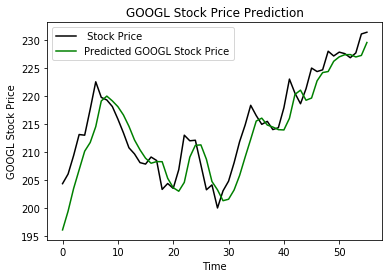

In [18]:
plt.plot(real_stock_price, color = 'black', label = ' Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted GOOGL Stock Price')
plt.title('GOOGL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('GOOGL Stock Price')
plt.legend()
plt.show()

In [19]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rmse =sqrt(mean_squared_error(predicted_stock_price, real_stock_price))
mse = mean_squared_error(predicted_stock_price, real_stock_price)
print(f' RMSE Error: {rmse:11.10}')
print(f' MSE Error: {mse:11.10}')

 RMSE Error:  3.78051681
 MSE Error: 14.29230735
